In [3]:
import pandas as pd

In [4]:
df=pd.read_csv('D:\\Click_stream\\train_data.csv')
df.head()

,year,month,day,order,country,session_id,page1_main_category,page2_clothing_model,colour,location,model_photography,price,price_2,page
0,2008,6,22,21,29,15648,3,C20,13,1,2,48,1,2
1,2008,5,19,6,29,10018,2,B26,13,3,1,57,1,2
2,2008,7,15,2,29,19388,3,C13,9,5,1,48,1,1
3,2008,5,2,2,29,7181,2,B11,2,4,1,43,2,1
4,2008,6,9,16,29,13493,2,B31,9,5,1,57,1,2


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132379 entries, 0 to 132378
Data columns (total 14 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   year                  132379 non-null  int64 
 1   month                 132379 non-null  int64 
 2   day                   132379 non-null  int64 
 3   order                 132379 non-null  int64 
 4   country               132379 non-null  int64 
 5   session_id            132379 non-null  int64 
 6   page1_main_category   132379 non-null  int64 
 7   page2_clothing_model  132379 non-null  object
 8   colour                132379 non-null  int64 
 9   location              132379 non-null  int64 
 10  model_photography     132379 non-null  int64 
 11  price                 132379 non-null  int64 
 12  price_2               132379 non-null  int64 
 13  page                  132379 non-null  int64 
dtypes: int64(13), object(1)
memory usage: 14.1+ MB


In [6]:
df.isnull().sum()

year                    0
month                   0
day                     0
order                   0
country                 0
session_id              0
page1_main_category     0
page2_clothing_model    0
colour                  0
location                0
model_photography       0
price                   0
price_2                 0
page                    0
dtype: int64

In [7]:
df['country'].unique()

array([29,  9, 46,  3, 24, 16, 44, 28, 21, 41, 37, 15, 42, 10, 43, 11, 31,
       27, 22, 25, 38, 18, 34, 14, 17, 32, 12, 47, 19, 39,  7,  2, 45, 23,
       20,  5, 30, 36,  6, 35, 33,  8, 26, 13,  1,  4])

In [8]:
country_mapping = {
    1:'Australia',
    2:'Austria',
    3:'Belgium',
    4:'British Virgin Islands',
    5:'Cayman Islands',
    6:'Christmas Island',
    7:'Croatia',
    8:'Cyprus',
    9:'Czech Republic',
    10:'Denmark',
    11:'Estonia',
    12:'unidentified',
    13:'Faroe Islands',
    14:'Finland',
    15:'France',
    16:'Germany',
    17:'Greece',
    18:'Hungary',
    19:'Iceland',
    20:'India',
    21:'Ireland',
    22:'Italy',
    23:'Latvia',
    24:'Lithuania',
    25:'Luxembourg',
    26:'Mexico',
    27:'Netherlands',
    28:'Norway',
    29:'Poland',
    30:'Portugal',
    31:'Romania',
    32:'Russia',
    33:'San Marino',
    34:'Slovakia',
    35:'Slovenia',
    36:'Spain',
    37:'Sweden',
    38:'Switzerland',
    39:'Ukraine',
    40:'United Arab Emirates',
    41:'United Kingdom',
    42:'USA',
    43:'biz (.biz)',
    44:'com (.com)',
    45:'int (.int)',
    46:'net (.net)',
    47:'org (*.org)'
}

df['country'] = df['country'].map(country_mapping)

In [9]:
df['country'].unique()

array(['Poland', 'Czech Republic', 'net (.net)', 'Belgium', 'Lithuania',
       'Germany', 'com (.com)', 'Norway', 'Ireland', 'United Kingdom',
       'Sweden', 'France', 'USA', 'Denmark', 'biz (.biz)', 'Estonia',
       'Romania', 'Netherlands', 'Italy', 'Luxembourg', 'Switzerland',
       'Hungary', 'Slovakia', 'Finland', 'Greece', 'Russia',
       'unidentified', 'org (*.org)', 'Iceland', 'Ukraine', 'Croatia',
       'Austria', 'int (.int)', 'Latvia', 'India', 'Cayman Islands',
       'Portugal', 'Spain', 'Christmas Island', 'Slovenia', 'San Marino',
       'Cyprus', 'Mexico', 'Faroe Islands', 'Australia',
       'British Virgin Islands'], dtype=object)

In [10]:
df['continent'] = ''

In [11]:
north_america = [
    'British Virgin Islands',
    'Cayman Islands',
    'Christmas Island',
    'Mexico',
    'USA',
]
asia = ['India', 'United Arab Emirates']
ocenia = ['Australia']
unidentified = [
    'biz (.biz)',
    'com (.com)',
    'int (.int)',
    'net (.net)',
    'org (*.org)',
    'unidentified'
]
europe = [
    'Austria',
    'Belgium',
    'Crotia',
    'Cyprus',
    'Czech Republic',
    'Denmark',
    'Estonia',
    'Faroe Islands',
    'Finland',
    'France',
    'Germany',
    'Greece',
    'Hungary',
    'Iceland',
    'Ireland',
    'Italy',
    'Latvia',
    'Lithuania',
    'Luxembourg',
    'Netherlands',
    'Norway',
    'Poland',
    'Portugal',
    'Romania',
    'Russia',
    'San Marino',
    'Slovakia',
    'Slovenia',
    'Spain',
    'Sweden',
    'Switzerland',
    'Ukraine',
    'United Kingdom'
]

In [12]:
for index, row in df.iterrows():
    if row['country'] in north_america:
        df.at[index, 'continent'] = 'North America'
    elif row['country'] in asia:
        df.at[index, 'continent'] = 'Asia'
    elif row['country'] in ocenia:
        df.at[index, 'continent'] = 'Ocenia'
    elif row['country'] in europe:
        df.at[index, 'continent'] = 'Europe'
    else:
        df.at[index, 'continent'] = 'Unidentified'

In [13]:
df['continent'].unique()

array(['Europe', 'Unidentified', 'North America', 'Asia', 'Ocenia'],
      dtype=object)

In [14]:
df['page1_main_category'].unique()

array([3, 2, 1, 4])

In [15]:
page1_mapping = {
    1:'Trousers',
    2:'Skirts',
    3:'Blouses',
    4:'Shirts'
}

df['page1_main_category'] = df['page1_main_category'].map(page1_mapping)


In [16]:
df['colour'].unique()

array([13,  9,  2, 12, 11,  3, 14,  7,  4,  1,  6,  8, 10,  5])

In [17]:
colour_mapping = {
    1:'Beige',
    2:'Black',
    3:'Blue',
    4:'Brown',
    5:'Burgundy',
    6:'Gray',
    7:'Green',
    8:'Navy Blue',
    9:'Purple',+
    10:'Olive',
    11:'Pink',
    12:'Red',
    13:'Violet',
    14:'White'
}

df['colour'] = df['colour'].map(colour_mapping)

In [18]:
df['location'].unique()

array([1, 3, 5, 4, 2, 6])

In [19]:
location_mapping = {
    1:'top left',
    2:'top in the middle',
    3:'top right',
    4:'bottom left',
    5:'bottom in the middle',
    6:'bottom right'
}

df['location'] = df['location'].map(location_mapping)

In [20]:
df['model_photography'].unique()

array([2, 1])

In [21]:
model_photo_mapping = {
    1:'en-face',
    2:'profile'
}

df['model_photography'] = df['model_photography'].map(model_photo_mapping)

In [22]:
df['price_2'].unique()

array([1, 2])

In [23]:
price_2_mapping = {
    1:'Purchased',
    2:'Not Purchased'
}

df['price_2'] = df['price_2'].map(price_2_mapping)

In [24]:
#DATA VISUALIZATION

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

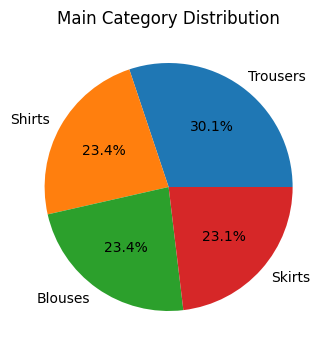

In [26]:
plt.figure(figsize=(4,6))
# Filter out the NaN values before plotting
page1_counts = df['page1_main_category'].value_counts().dropna()
plt.pie(x=page1_counts, labels=page1_counts.index, autopct='%1.1f%%')
plt.title('Main Category Distribution')
plt.show()

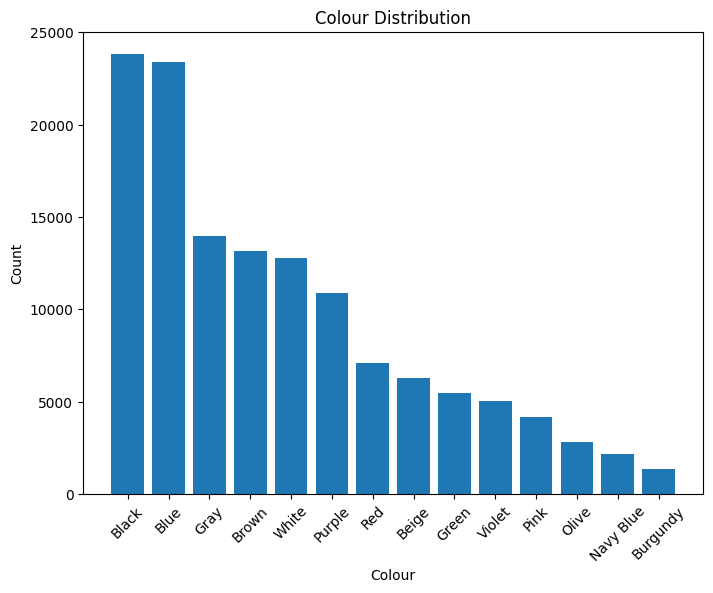

In [27]:
plt.figure(figsize=(8,6))
plt.bar(df['colour'].value_counts().index, df['colour'].value_counts().values)
plt.xlabel('Colour')
plt.ylabel('Count')
plt.title('Colour Distribution')
plt.xticks(rotation=45)
plt.show()

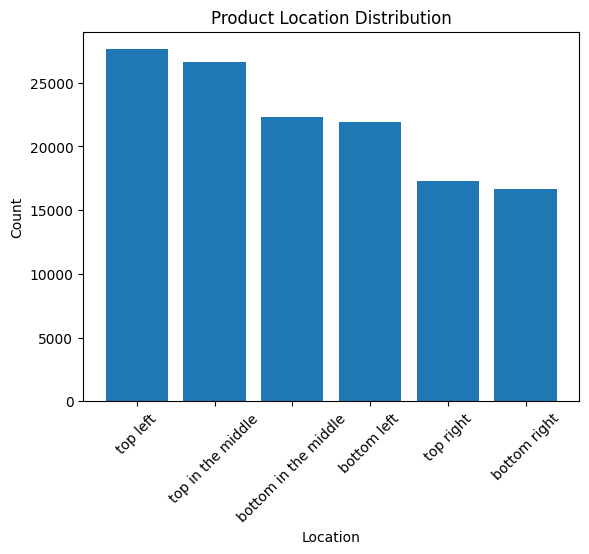

In [28]:
plt.Figure(figsize=(8,6))
plt.bar(df['location'].value_counts().index, df['location'].value_counts().values)
plt.xlabel('Location')
plt.ylabel('Count')
plt.title('Product Location Distribution')
plt.xticks(rotation=45)
plt.show()

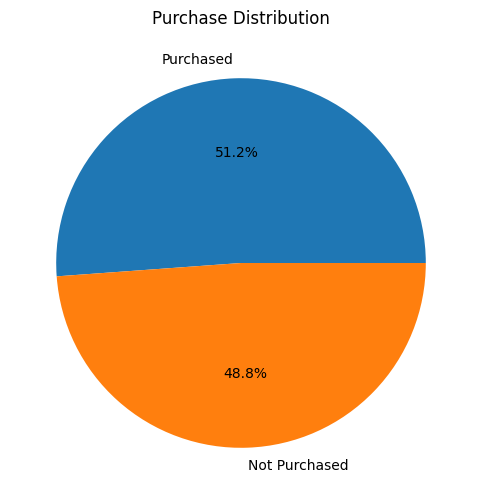

In [29]:
plt.figure(figsize=(8,6))
# Filter out the NaN values before plotting
price_2_counts = df['price_2'].value_counts().dropna()
plt.pie(x=price_2_counts, labels=price_2_counts.index, autopct='%1.1f%%')
plt.title('Purchase Distribution')
plt.show()

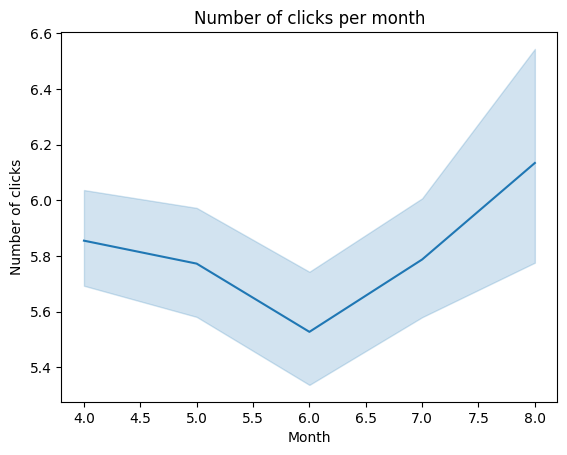

In [30]:
monthly_clicks=df.groupby(['session_id','month'])['session_id'].count().reset_index(name='count')
plt.title('Number of clicks per month')
sns.lineplot(data=monthly_clicks,x='month',y='count')
plt.xlabel('Month')
plt.ylabel('Number of clicks')
plt.show()

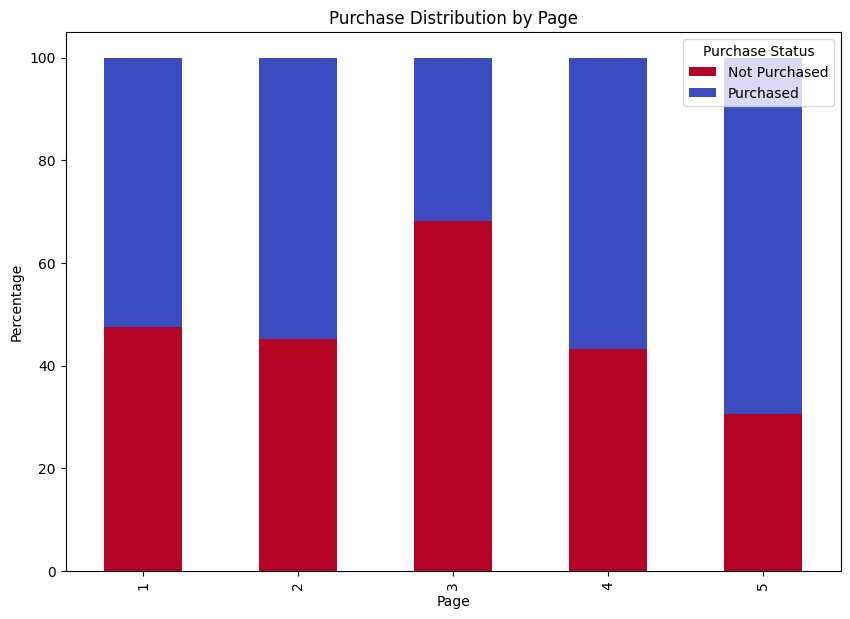

In [31]:
page_price2_cross = pd.crosstab(df['page'], df['price_2'], normalize='index') * 100
page_price2_cross.plot(kind='bar', stacked=True, figsize=(10, 7), colormap='coolwarm_r')
plt.xlabel('Page')
plt.ylabel('Percentage')
plt.title('Purchase Distribution by Page')
plt.legend(title='Purchase Status')
plt.show()